### 👥 Integrantes: 

- [Alan Gonçalves](https://github.com/alansgoncalves)
- [Élen Silva Almeida](https://github.com/Lely0sa)
- [Gabriel Matina](https://github.com/gabrielmatina)
- [Gustavo Dell Anhol Oliveira](https://github.com/gudaoliveira)
- [Patrick Kwan](https://github.com/ptkwan)

Tópicos das aulas

- Estatística descritiva
- Probabilidade e distribuições
- Inferência
- Amostragem
- Testes estatísticos de hipótese

_A proposta do projeto final é desenvolver uma análise exploratória de dados
(EDA) com enfoque na avaliação de relações entre as variáveis medidas e uma variável
dependente, a qual constitui aquilo que geralmente se costuma objetivar prever em uma base de dados._

[Entregar neste link](https://docs.google.com/spreadsheets/d/1qBwKAnW83AZUQlgzldMMi50QqsZBuBC7CI4_P68boVM/edit#gid=0)

- Determinar a taxa geral de rotatividade de funcionários na empresa.
    - Analisar a distribuição da rotatividade por departamento e cargo
    - Comparar a rotatividade entre diferentes grupos demográficos, como gênero, nível de educação, campo de educação, etc.

- Salário e Benefícios:
    - Comparar a renda mensal média entre funcionários que deixaram a empresa e aqueles que permaneceram.
    - Analisar a relação entre a satisfação no trabalho e o salário ou benefícios.

- Experiência Profissional:
    - Avaliar a relação entre o número de anos de experiência total e a probabilidade de rotatividade.
    - Investigar se existe uma diferença na rotatividade entre funcionários que trabalharam em várias empresas anteriormente e aqueles que não o fizeram.

- Satisfação no Trabalho e Envolvimento:
    - Analisar a relação entre o nível de satisfação no trabalho e a probabilidade de rotatividade.

O primeiro passo é instalar as bibliotecas necessárias no projeto.

Para isso abra o terminal (CTRL+J), copie os dados abaixo, cole no terminal e precione enter.

pip install pandas
pip install numpy
pip install scikit-learn
pip install statsmodels
pip install plotly
pip install plotly
pip install folium

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv('data.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
list_of_col = df.columns

for col in list_of_col:
    print(col)

Age
Attrition
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EducationField
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
MonthlyIncome
MonthlyRate
NumCompaniesWorked
Over18
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [6]:
# - Analisar a distribuição da rotatividade por departamento
#
# Colunas
#   Attrition
#   Department
#   JobRole


count_dep = df[['Department', 'EmployeeNumber']]
count_dep = count_dep.groupby('Department')['EmployeeNumber'].count().reset_index()
count_dep['ShareEmployees %'] = count_dep['EmployeeNumber'].apply(lambda x: round(x / sum(count_dep['EmployeeNumber']) * 100, 2))
count_dep = count_dep.sort_values('EmployeeNumber', ascending=False)


rotativ_dep = df[['Attrition', 'Department']]
rotativ_dep = rotativ_dep.groupby('Department')['Attrition'].sum().reset_index()
rotativ_dep = rotativ_dep.sort_values('Attrition', ascending=False)

count_dep = pd.merge(count_dep, rotativ_dep, on='Department')
count_dep['ShareAttrition %'] = count_dep.apply(lambda row: round(row['Attrition'] / row['EmployeeNumber'] * 100, 2), axis=1)

count_dep_total = pd.DataFrame([{
    'Department':'Total',
    'EmployeeNumber': count_dep['EmployeeNumber'].sum(),
    'ShareEmployees %': count_dep['ShareEmployees %'].sum(),
    'Attrition':count_dep['Attrition'].sum(),
    'ShareAttrition %':count_dep['ShareAttrition %'].sum()}])
count_dep = pd.concat([count_dep, count_dep_total], ignore_index = True)

df_long = pd.melt(id_vars=count_dep['Department'], value_vars=count_dep[['EmployeeNumber', 'Attrition']])

display(count_dep)
sns.barplot(data=df_long, x='x', y='Valores', hue='Y', palette='muted')


TypeError: melt() missing 1 required positional argument: 'frame'

,JobRole,EmployeeNumber,Share %
0,Sales Executive,232,21.93
1,Research Scientist,214,20.23
2,Laboratory Technician,188,17.77
3,Manufacturing Director,107,10.11
4,Healthcare Representative,88,8.32
5,Manager,79,7.47
6,Research Director,62,5.86
7,Sales Representative,58,5.48
8,Human Resources,30,2.84
9,Total,1058,100.01


,JobRole,Attrition
0,Healthcare Representative,8
1,Human Resources,6
2,Laboratory Technician,49
3,Manager,5
4,Manufacturing Director,7
5,Research Director,2
6,Research Scientist,38
7,Sales Executive,39
8,Sales Representative,25


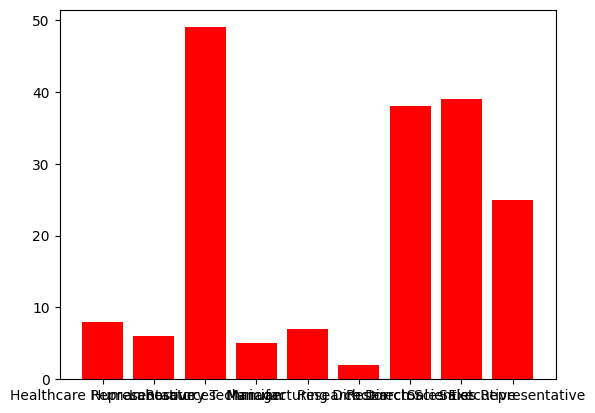

In [ ]:
# - Analisar a distribuição da rotatividade por departamento
#
# Colunas
#   Attrition
#   Department
#   JobRole


count_dep = df[['JobRole', 'EmployeeNumber']]
count_dep = count_dep.groupby('JobRole')['EmployeeNumber'].count().reset_index()
count_dep['Share %'] = count_dep['EmployeeNumber'].apply(lambda x: round(x / sum(count_dep['EmployeeNumber']) * 100, 2))
count_dep = count_dep.sort_values('EmployeeNumber', ascending=False)

count_dep_total = pd.DataFrame([{
    'JobRole':'Total',
    'EmployeeNumber': count_dep['EmployeeNumber'].sum(),
    'Share %': count_dep['Share %'].sum()}])
count_dep = pd.concat([count_dep, count_dep_total], ignore_index = True)

rotativ_dep = df[['Attrition', 'JobRole']]
rotativ_dep = rotativ_dep.groupby('JobRole')['Attrition'].sum().reset_index()

display(count_dep)
display(rotativ_dep)
plt.bar(rotativ_dep['JobRole'], rotativ_dep['Attrition'], color='red')
plt.show()

Quantidade de pessoas por setor

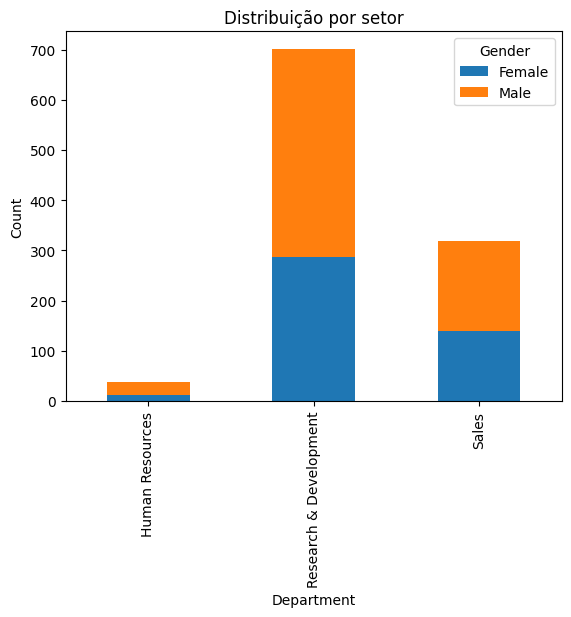

In [ ]:
gender_department_counts = df.groupby(['Department', 'Gender']).size().unstack()

# Plotar um gráfico de barras para visualizar a distribuição de homens e mulheres em cada setor
gender_department_counts.plot(kind='bar', stacked=True)
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Distribuição por setor')
plt.legend(title='Gender')
plt.show()

Comparativo de salários entre homens e mulheres em cada setor

<Figure size 1200x800 with 0 Axes>

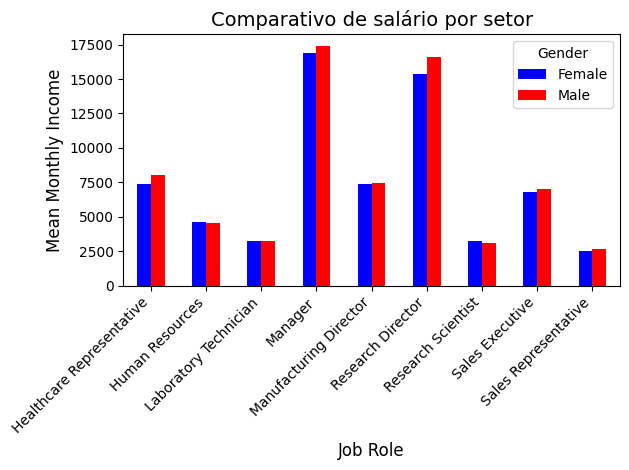

In [ ]:
# Calcular a média salarial para homens e mulheres de cada jobrole
salary_by_jobrole_gender = df.groupby(['JobRole', 'Gender'])['MonthlyIncome'].mean().unstack()

# Plotar o gráfico de barras
plt.figure(figsize=(12, 8))
salary_by_jobrole_gender.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Mean Monthly Income', fontsize=12)
plt.title('Comparativo de salário por setor', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para facilitar a leitura
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

Comparativo da média salarial por entre homens e mulheres de acordo com a idade

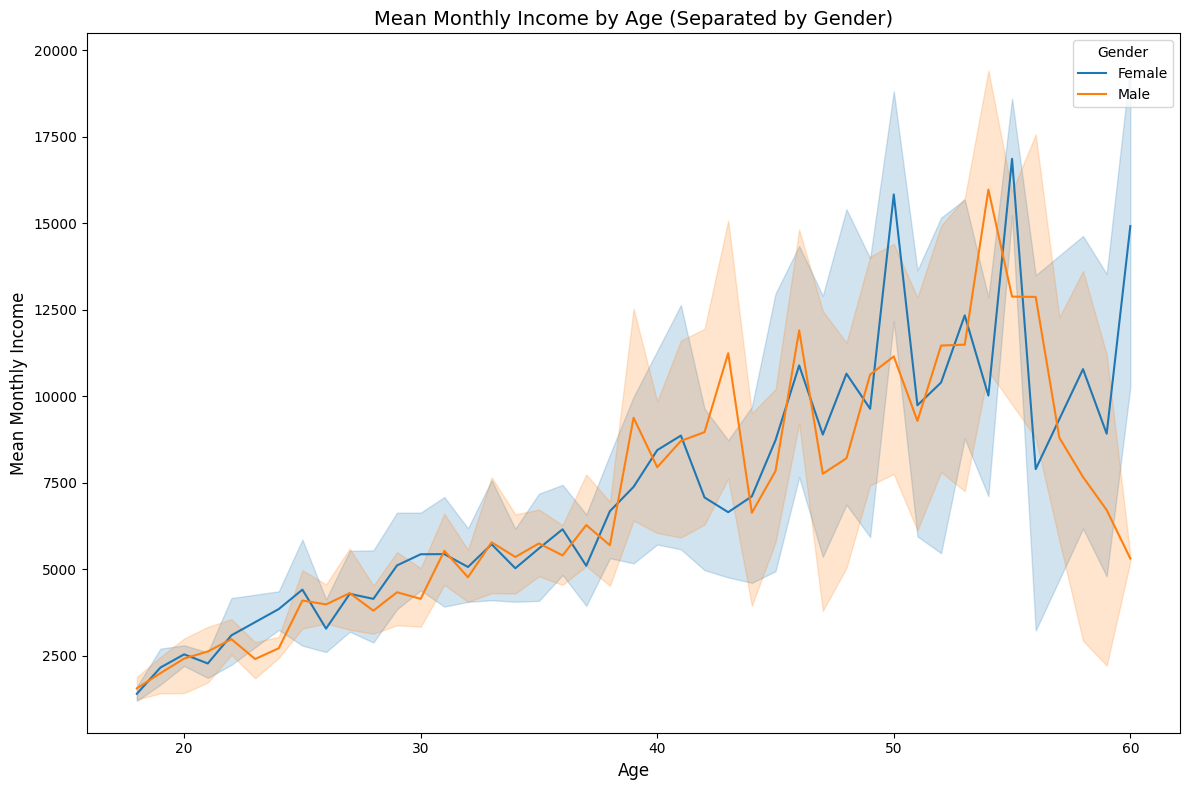

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Age', y='MonthlyIncome', hue='Gender', estimator='mean')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Mean Monthly Income', fontsize=12)
plt.title('Mean Monthly Income by Age (Separated by Gender)', fontsize=14)
plt.tight_layout()
plt.show()

Comparativo da média de salários entre homens e mulheres de acordo com o tempo de empresa

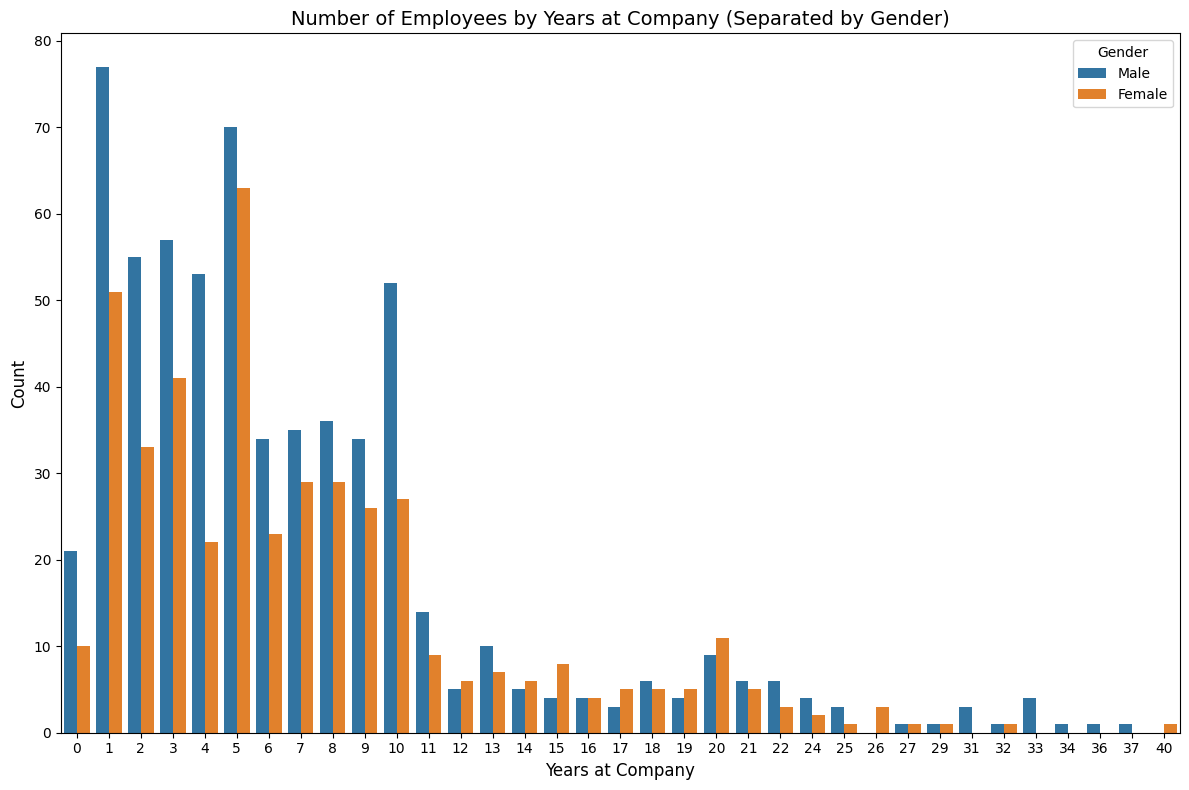

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='YearsAtCompany', hue='Gender')
plt.xlabel('Years at Company', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Number of Employees by Years at Company (Separated by Gender)', fontsize=14)
plt.tight_layout()
plt.show()

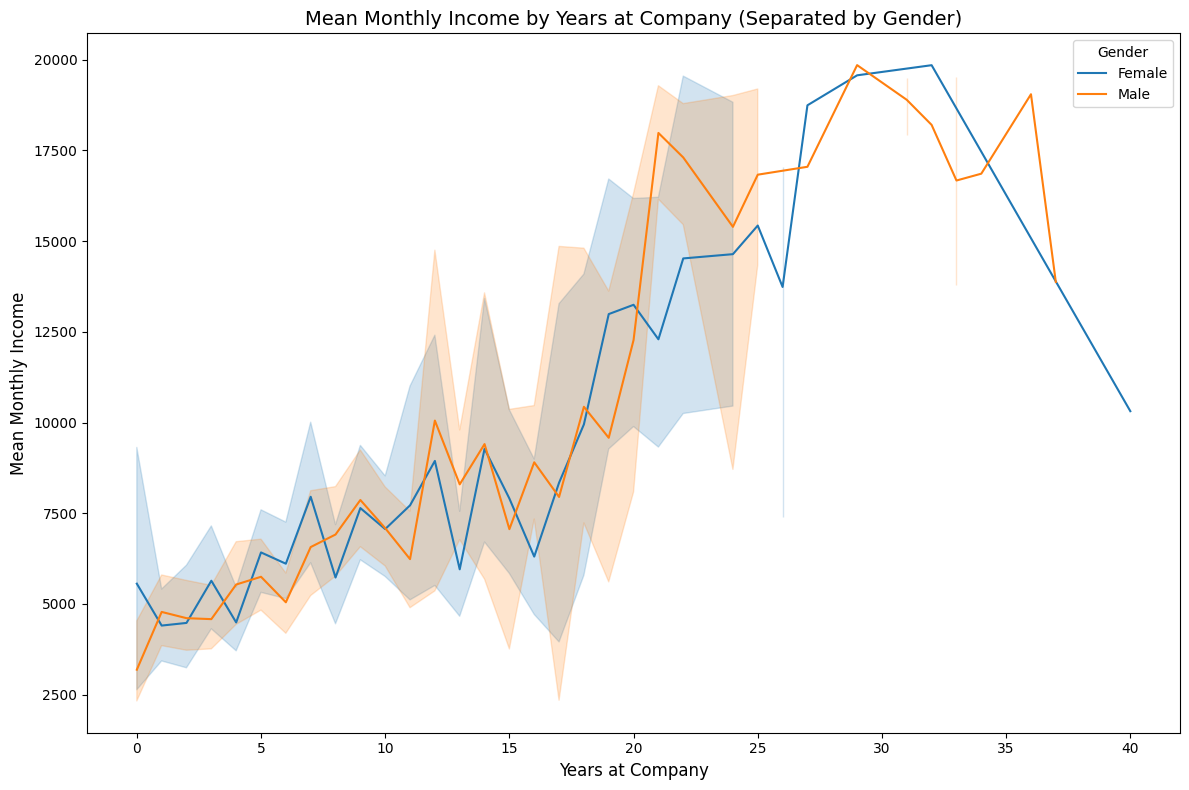

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='YearsAtCompany', y='MonthlyIncome', hue='Gender', estimator='mean')
plt.xlabel('Years at Company', fontsize=12)
plt.ylabel('Mean Monthly Income', fontsize=12)
plt.title('Mean Monthly Income by Years at Company (Separated by Gender)', fontsize=14)
plt.tight_layout()
plt.show()

# Desempenho e Promoção (PerformanceRating, PercentSalaryHike):

Distribuição das avaliações de desempenho e dos percentuais de aumento salarial.
Relação entre desempenho, aumento salarial e satisfação no trabalho.

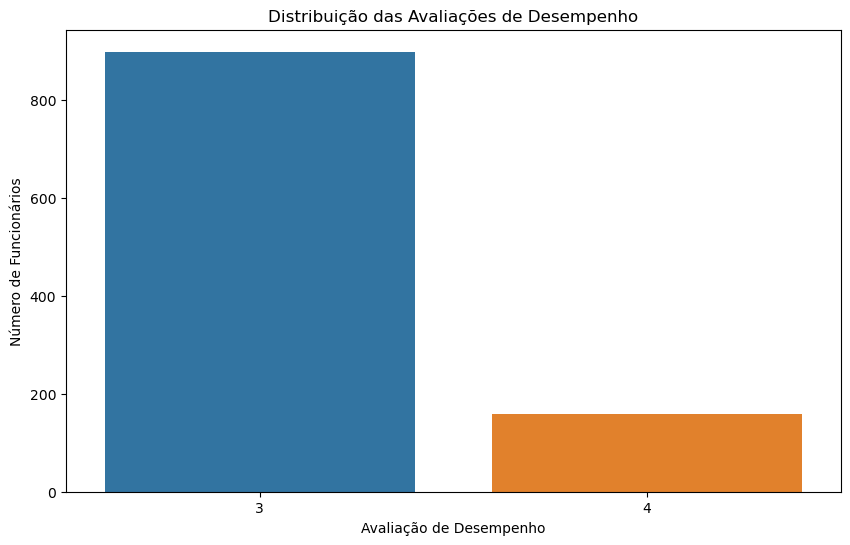

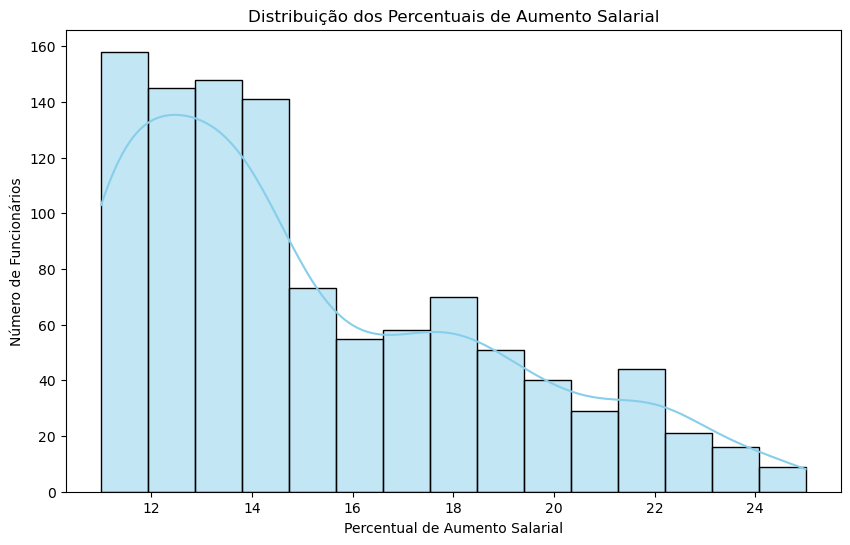

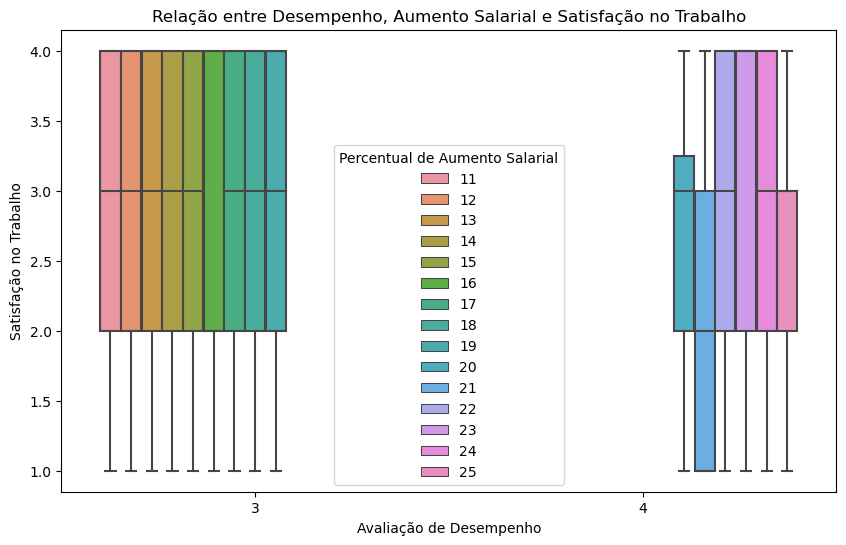

In [7]:
data = df.copy()

# Distribuição das avaliações de desempenho
plt.figure(figsize=(10, 6))
sns.countplot(x='PerformanceRating', data=data)
plt.title('Distribuição das Avaliações de Desempenho')
plt.xlabel('Avaliação de Desempenho')
plt.ylabel('Número de Funcionários')
plt.show()

# Distribuição dos percentuais de aumento salarial
plt.figure(figsize=(10, 6))
sns.histplot(data['PercentSalaryHike'], bins=15, kde=True, color='skyblue')
plt.title('Distribuição dos Percentuais de Aumento Salarial')
plt.xlabel('Percentual de Aumento Salarial')
plt.ylabel('Número de Funcionários')
plt.show()

# Relação entre desempenho, aumento salarial e satisfação no trabalho
plt.figure(figsize=(10, 6))
sns.boxplot(x='PerformanceRating', y='JobSatisfaction', hue='PercentSalaryHike', data=data)
plt.title('Relação entre Desempenho, Aumento Salarial e Satisfação no Trabalho')
plt.xlabel('Avaliação de Desempenho')
plt.ylabel('Satisfação no Trabalho')
plt.legend(title='Percentual de Aumento Salarial')
plt.show()

# Viagens a Negócios (BusinessTravel):

Proporção de funcionários que viajam a negócios com frequência.
Relação entre viagens a negócios e satisfação no trabalho.

Proporção de funcionários que viajam a negócios com frequência: 0.19


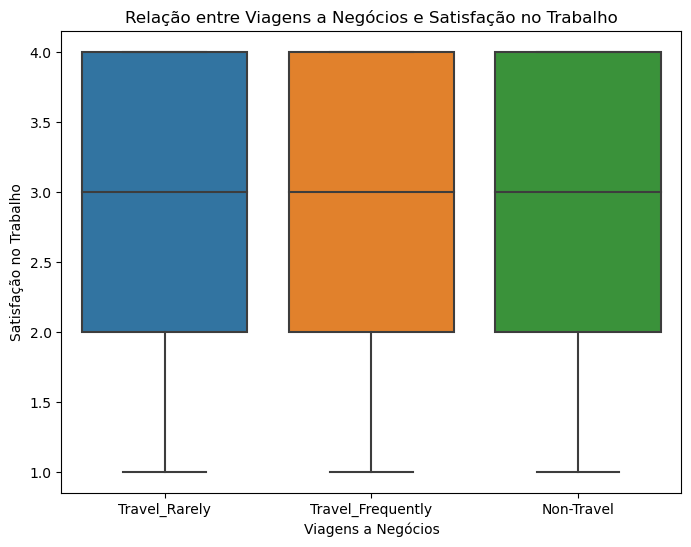

In [8]:
# Proporção de funcionários que viajam a negócios com frequência
total_funcionarios = len(data)
freq_business_travelers = len(data[data['BusinessTravel'] == 'Travel_Frequently'])
proporcao_freq_business_travelers = freq_business_travelers / total_funcionarios

print(f'Proporção de funcionários que viajam a negócios com frequência: {proporcao_freq_business_travelers:.2f}')

# Relação entre viagens a negócios e satisfação no trabalho
plt.figure(figsize=(8, 6))
sns.boxplot(x='BusinessTravel', y='JobSatisfaction', data=data)
plt.title('Relação entre Viagens a Negócios e Satisfação no Trabalho')
plt.xlabel('Viagens a Negócios')
plt.ylabel('Satisfação no Trabalho')
plt.show()

# Média de satisfação em cada área.
Distribuição da satisfação em cada área (histograma, boxplot).
Relação entre diferentes medidas de satisfação (por exemplo, correlação entre JobSatisfaction e RelationshipSatisfaction).
Tempo na Empresa (YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager):

Média de satisfação em cada área:
JobSatisfaction             2.749527
EnvironmentSatisfaction     2.712665
RelationshipSatisfaction    2.726843
WorkLifeBalance             2.763705
dtype: float64


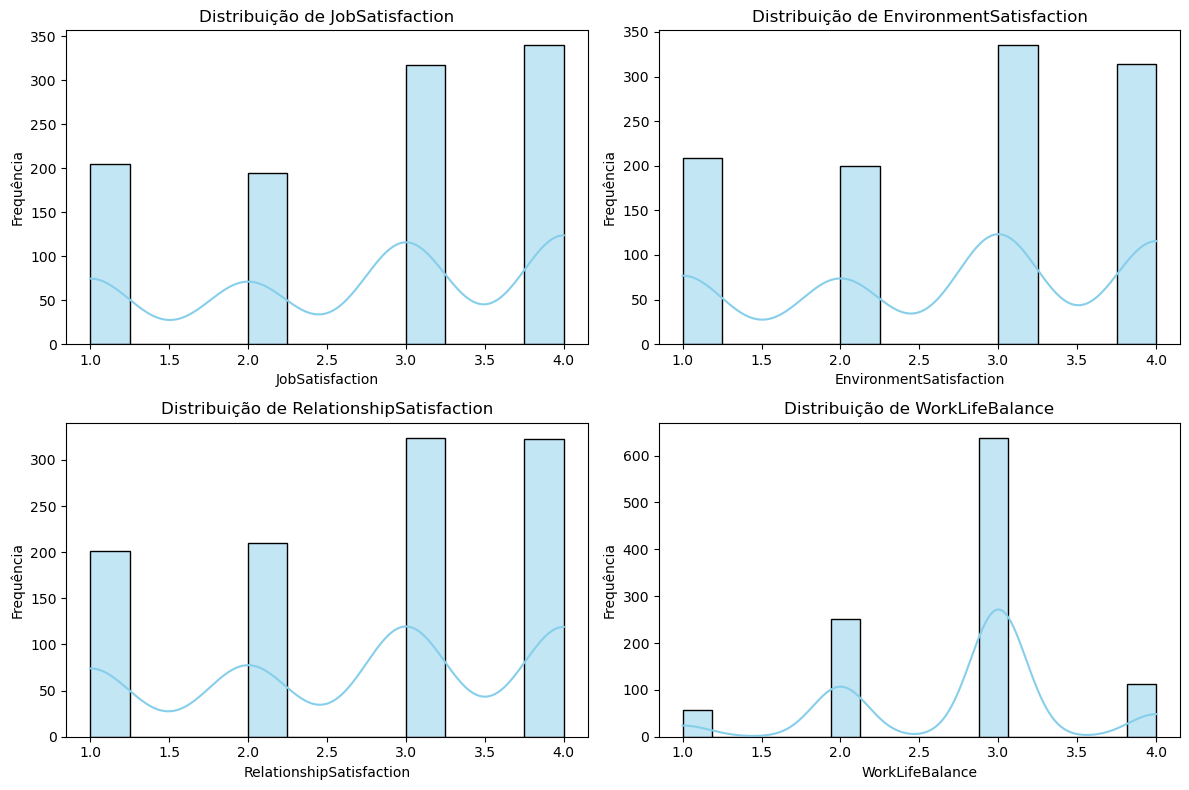

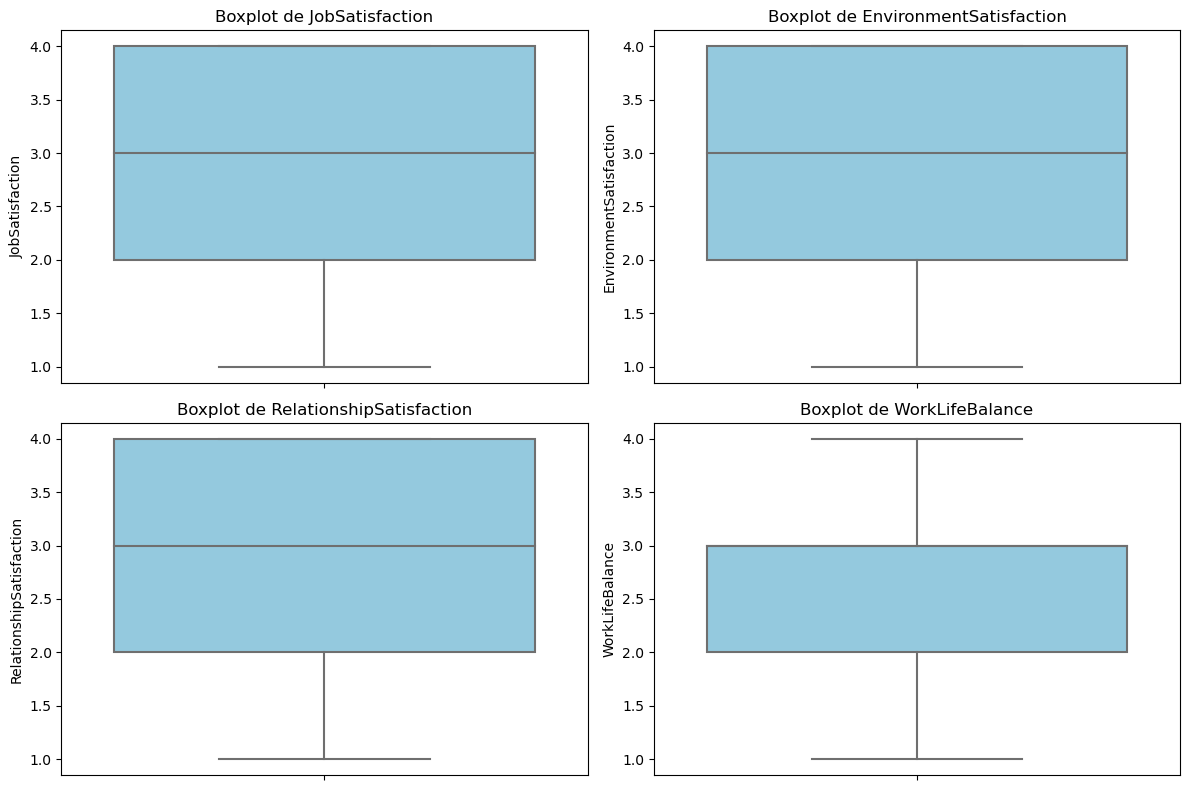

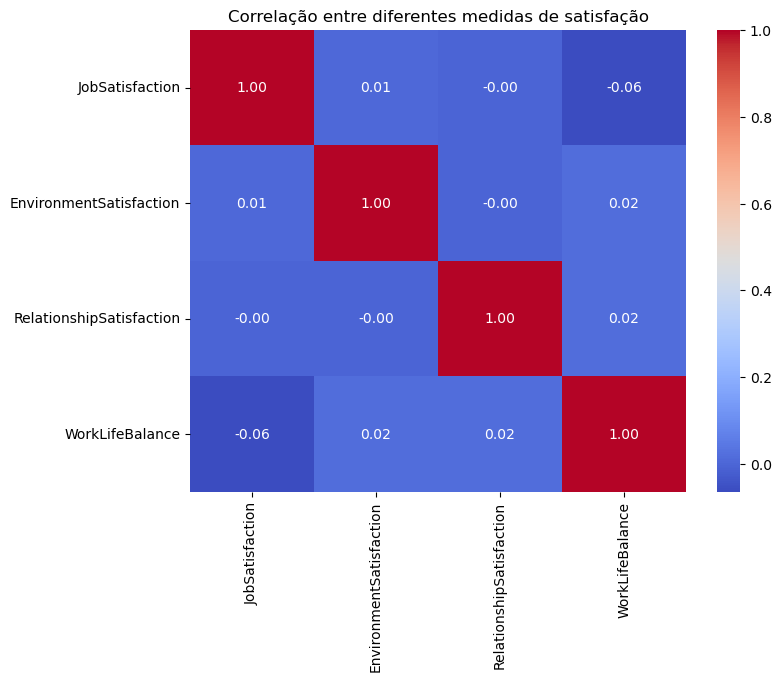

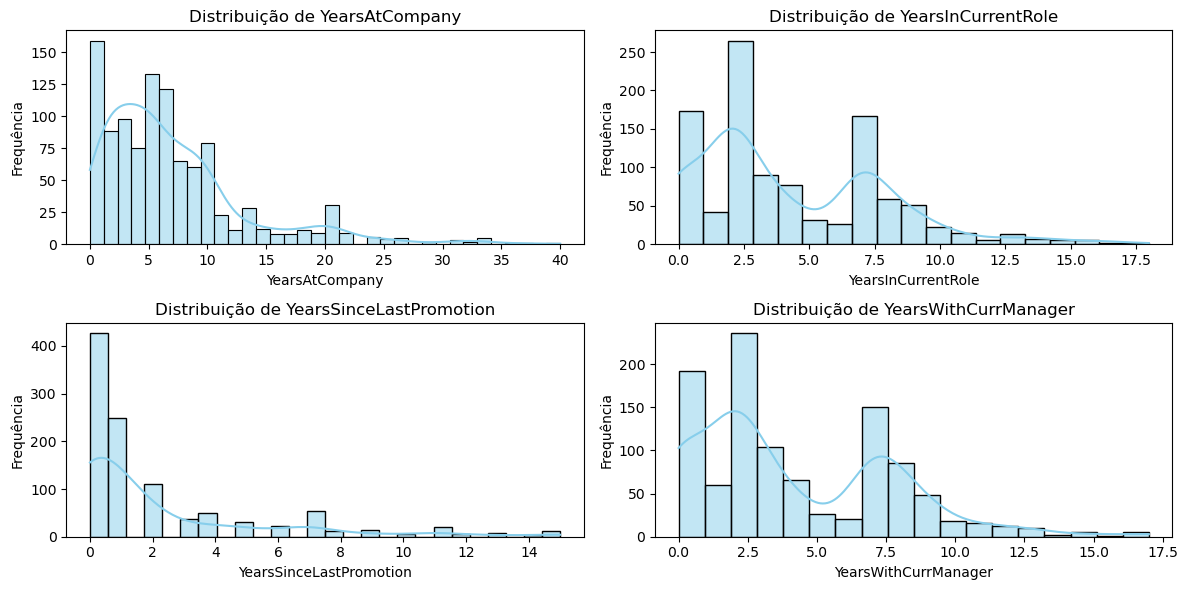

In [9]:
# Média de satisfação em cada área
satisfaction_cols = ['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']
satisfaction_means = data[satisfaction_cols].mean()

print("Média de satisfação em cada área:")
print(satisfaction_means)

# Distribuição da satisfação em cada área (histograma, boxplot)
plt.figure(figsize=(12, 8))
for i, col in enumerate(satisfaction_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, col in enumerate(satisfaction_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Relação entre diferentes medidas de satisfação
satisfaction_corr = data[satisfaction_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(satisfaction_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre diferentes medidas de satisfação')
plt.show()

# Tempo na Empresa (YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager)
plt.figure(figsize=(12, 6))
years_cols = ['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
for i, col in enumerate(years_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

Média de renda mensal dos funcionários: 6625.945179584121


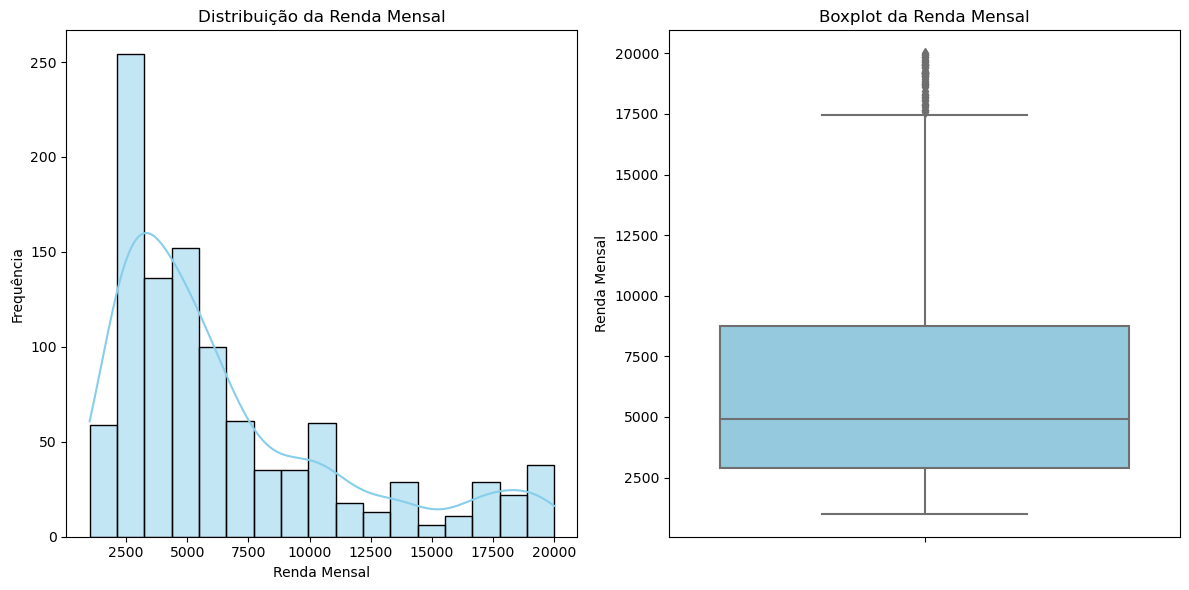

Quartis da renda mensal:
0.25    2900.25
0.50    4903.50
0.75    8736.50
Name: MonthlyIncome, dtype: float64


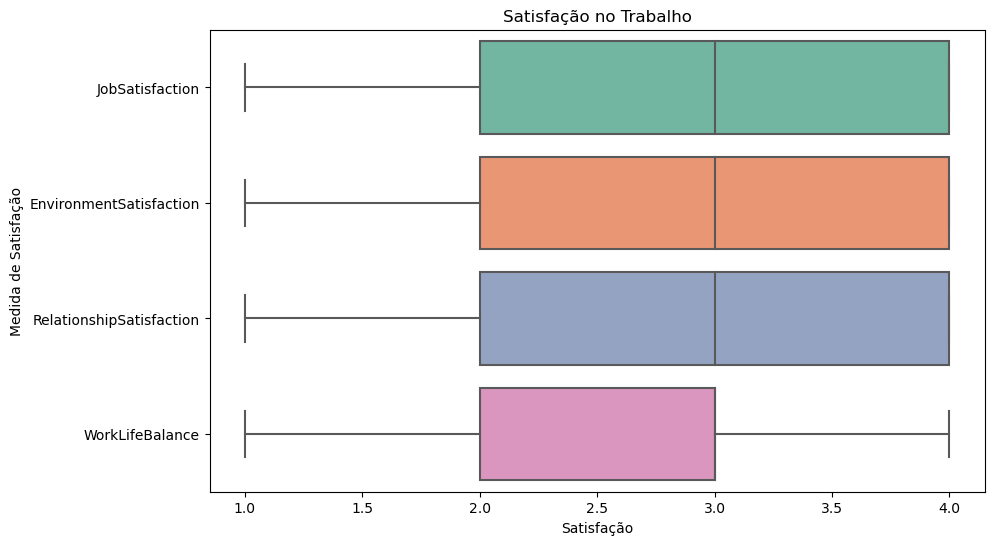

In [10]:
# Média de renda mensal dos funcionários
mean_monthly_income = data['MonthlyIncome'].mean()
print("Média de renda mensal dos funcionários:", mean_monthly_income)

# Distribuição da renda mensal (histograma, boxplot)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['MonthlyIncome'], kde=True, color='skyblue')
plt.title('Distribuição da Renda Mensal')
plt.xlabel('Renda Mensal')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
sns.boxplot(y=data['MonthlyIncome'], color='skyblue')
plt.title('Boxplot da Renda Mensal')
plt.ylabel('Renda Mensal')

plt.tight_layout()
plt.show()

# Quartis da renda mensal
quartis = data['MonthlyIncome'].quantile([0.25, 0.5, 0.75])
print("Quartis da renda mensal:")
print(quartis)

# Satisfação no Trabalho (JobSatisfaction, EnvironmentSatisfaction, RelationshipSatisfaction, WorkLifeBalance)
satisfaction_cols = ['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']

# Boxplot para cada medida de satisfação
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[satisfaction_cols], orient="h", palette="Set2")
plt.title('Satisfação no Trabalho')
plt.xlabel('Satisfação')
plt.ylabel('Medida de Satisfação')
plt.show()

# Vamos abordar cada uma das análises estatísticas para as colunas fornecidas:

Estatística Descritiva:

Você pode calcular medidas descritivas como média, mediana, moda, desvio padrão, mínimo e máximo para cada uma das variáveis numéricas, como Age, DailyRate, MonthlyIncome, TotalWorkingYears, YearsAtCompany, etc.
Probabilidade e Distribuições:

Você pode investigar a distribuição de variáveis como Age, MonthlyIncome, YearsAtCompany para entender se seguem uma distribuição normal ou se têm alguma distribuição específica. Isso pode ajudar na modelagem estatística e na compreensão da natureza dos dados.
Inferência:

Com base em uma amostra dos dados, você pode fazer inferências sobre a população de funcionários. Por exemplo, pode-se inferir a média de idade, a média de renda mensal, a média de anos na empresa para toda a população com base nas amostras disponíveis.
Amostragem:

Você pode usar técnicas de amostragem para extrair amostras aleatórias dos dados e fazer inferências sobre a população com base nessas amostras. Isso pode ajudar a reduzir o viés nos seus resultados e garantir que suas conclusões sejam representativas da população em geral.
Testes Estatísticos de Hipótese:

Você pode realizar vários testes de hipóteses para investigar relações entre diferentes variáveis. Por exemplo, você pode testar se existe diferença significativa de salário entre funcionários de diferentes departamentos usando um teste ANOVA ou se existe diferença significativa de idade entre funcionários que saíram da empresa (Attrition = "Yes") e aqueles que permaneceram (Attrition = "No") usando um teste t.
Esses são apenas alguns exemplos de análises estatísticas que podem ser realizadas com os dados fornecidos. A escolha das técnicas e análises depende dos objetivos específicos da sua investigação e das questões que você deseja responder com os dados.

In [12]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,57,0,Travel_Rarely,405,Research & Development,1,2,Life Sciences,1,1483,...,1,80,1,13,2,2,12,9,2,8
1054,49,0,Travel_Rarely,1490,Research & Development,7,4,Life Sciences,1,1484,...,2,80,2,29,3,3,8,7,0,7
1055,34,0,Travel_Frequently,829,Research & Development,15,3,Medical,1,1485,...,4,80,2,16,3,2,14,8,6,9
1056,28,1,Travel_Frequently,1496,Sales,1,3,Technical Degree,1,1486,...,4,80,1,5,3,4,3,2,1,2


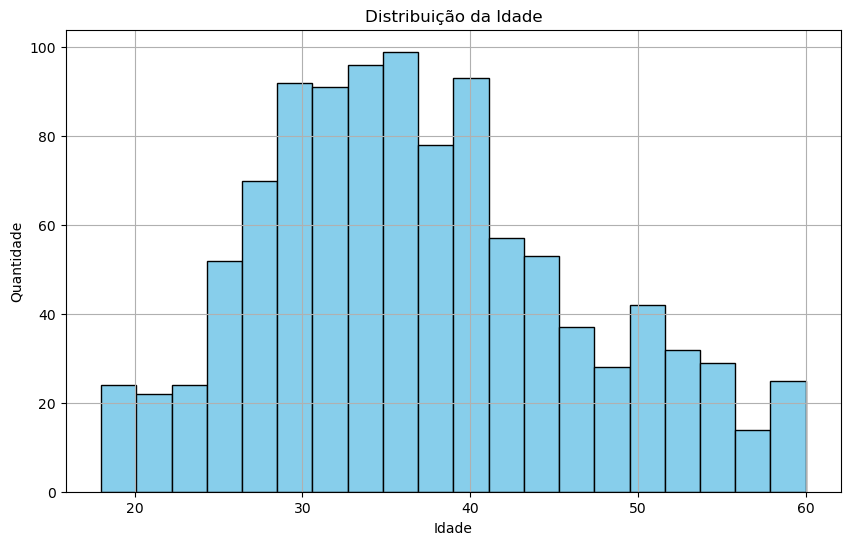

Teste de Shapiro-Wilk para Age: Estatística = 0.9753188490867615, Valor p = 1.9454745973923604e-12


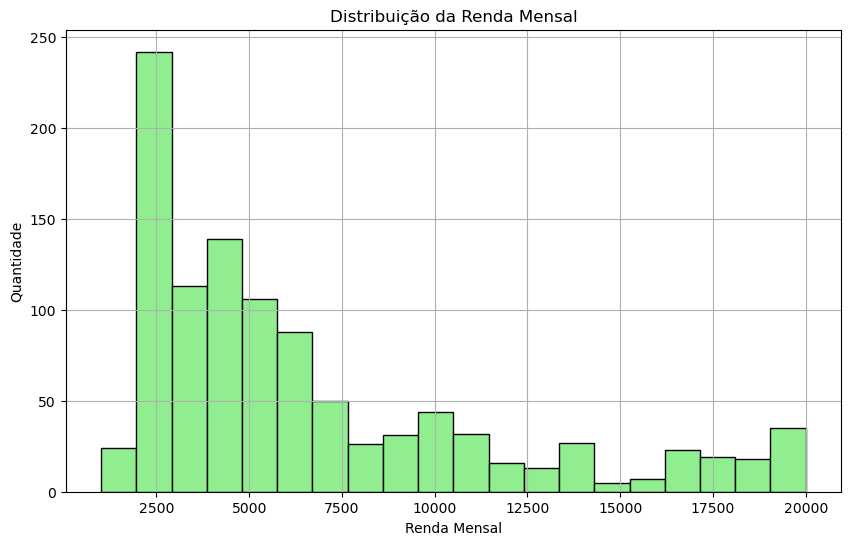

Teste de Shapiro-Wilk para MonthlyIncome: Estatística = 0.8305355310440063, Valor p = 4.8520736320833586e-32


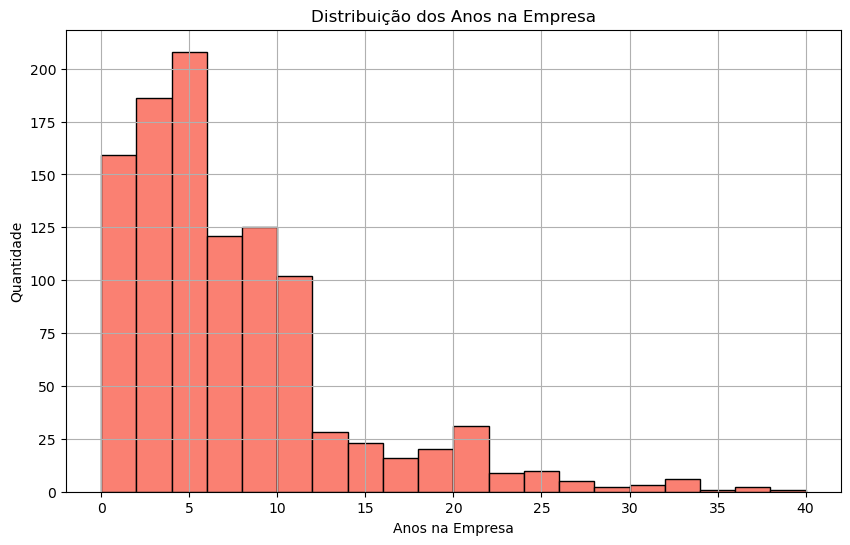

Teste de Shapiro-Wilk para YearsAtCompany: Estatística = 0.8343498706817627, Valor p = 9.440532664292837e-32


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# Suponha que 'data' seja o DataFrame que contém seus dados

# Distribuição da idade (Age)
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.grid(True)
plt.show()

# Teste de normalidade (Shapiro-Wilk) para Age
shapiro_stat, shapiro_p_value = shapiro(data['Age'])
print(f'Teste de Shapiro-Wilk para Age: Estatística = {shapiro_stat}, Valor p = {shapiro_p_value}')

# Distribuição da renda mensal (MonthlyIncome)
plt.figure(figsize=(10, 6))
plt.hist(data['MonthlyIncome'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribuição da Renda Mensal')
plt.xlabel('Renda Mensal')
plt.ylabel('Quantidade')
plt.grid(True)
plt.show()

# Teste de normalidade (Shapiro-Wilk) para MonthlyIncome
shapiro_stat, shapiro_p_value = shapiro(data['MonthlyIncome'])
print(f'Teste de Shapiro-Wilk para MonthlyIncome: Estatística = {shapiro_stat}, Valor p = {shapiro_p_value}')

# Distribuição dos anos na empresa (YearsAtCompany)
plt.figure(figsize=(10, 6))
plt.hist(data['YearsAtCompany'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribuição dos Anos na Empresa')
plt.xlabel('Anos na Empresa')
plt.ylabel('Quantidade')
plt.grid(True)
plt.show()

# Teste de normalidade (Shapiro-Wilk) para YearsAtCompany
shapiro_stat, shapiro_p_value = shapiro(data['YearsAtCompany'])
print(f'Teste de Shapiro-Wilk para YearsAtCompany: Estatística = {shapiro_stat}, Valor p = {shapiro_p_value}')

# CARA, SE PRECISAR PODEMOS FAZER O SEGUINTE:

### Análise Exploratória:
Distribuição de Idade (Age):

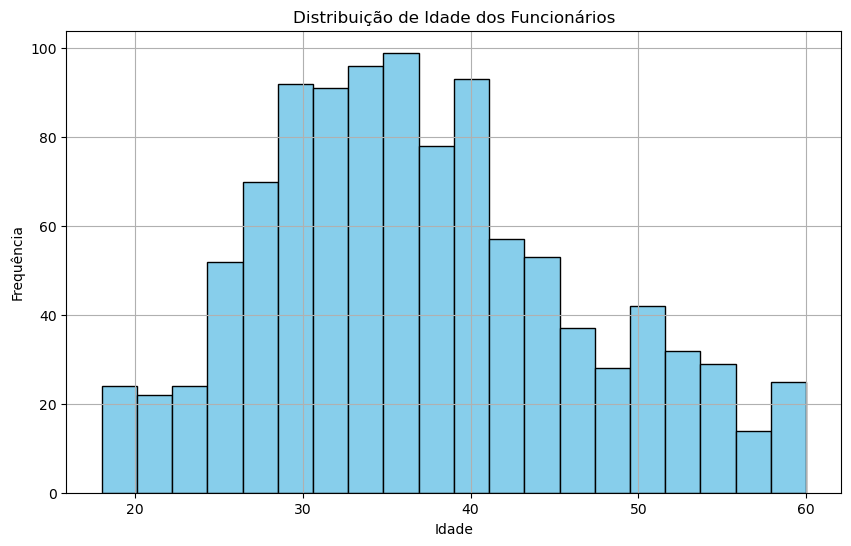

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição de Idade dos Funcionários')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

Insight: A maioria dos funcionários tem entre 25 e 45 anos.



___________

### Satisfação no Trabalho (JobSatisfaction):

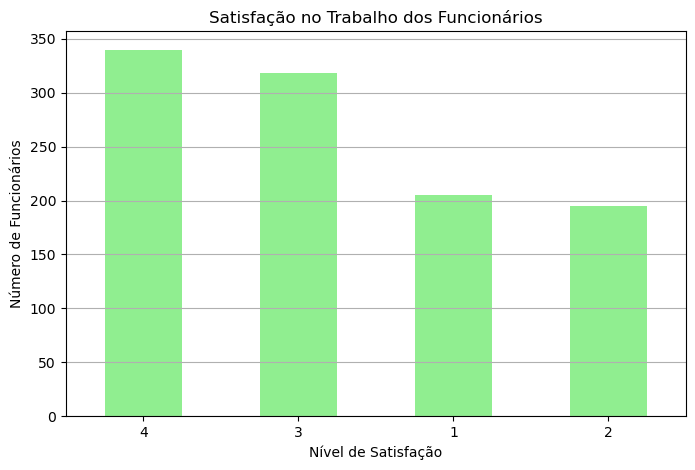

In [17]:
plt.figure(figsize=(8, 5))
data['JobSatisfaction'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Satisfação no Trabalho dos Funcionários')
plt.xlabel('Nível de Satisfação')
plt.ylabel('Número de Funcionários')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Insight: A maioria dos funcionários parece estar moderadamente satisfeita com seu trabalho.

__________

### Relação entre Horas Extras (OverTime) e Atrito (Attrition):

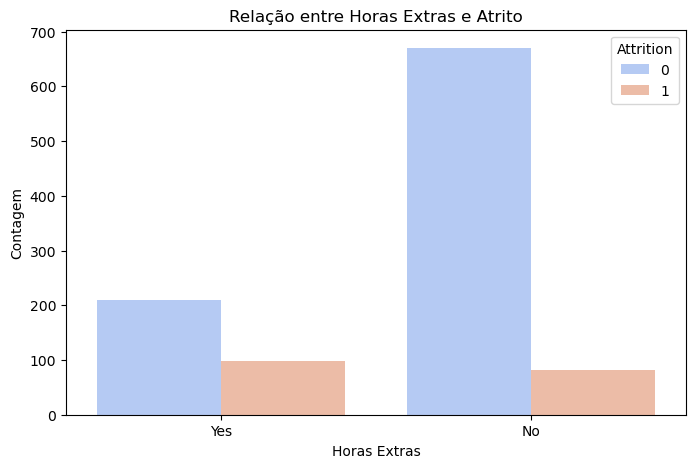

In [18]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='OverTime', hue='Attrition', palette='coolwarm')
plt.title('Relação entre Horas Extras e Atrito')
plt.xlabel('Horas Extras')
plt.ylabel('Contagem')
plt.show()

Insight: Funcionários que fazem horas extras tendem a ter uma taxa de atrito mais alta.

___________________

### Distribuição de Salário Mensal (MonthlyIncome) por Departamento (Department):

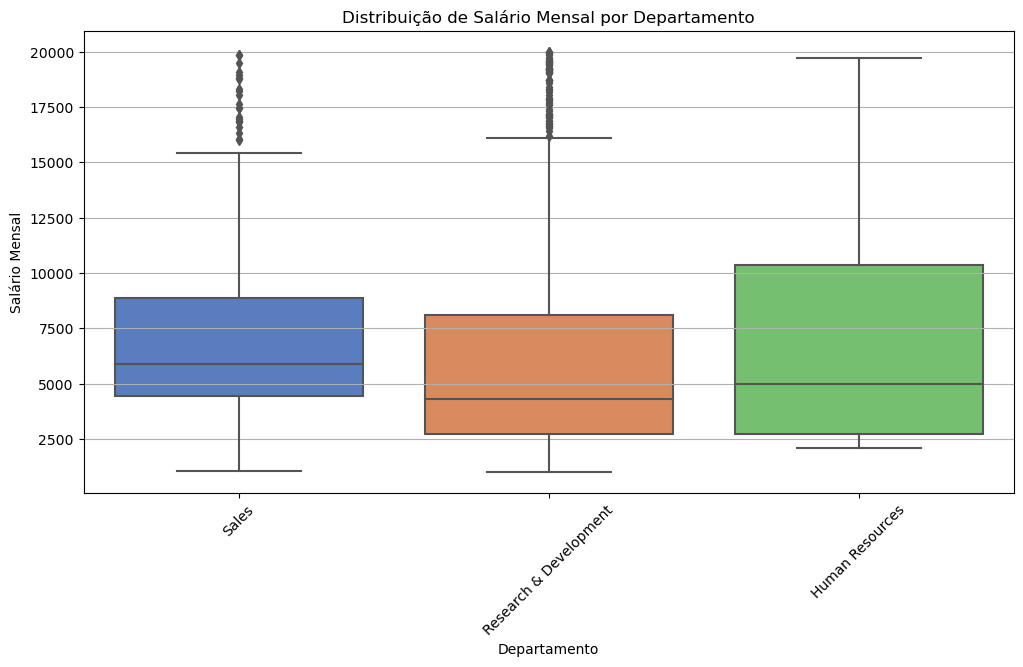

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Department', y='MonthlyIncome', palette='muted')
plt.title('Distribuição de Salário Mensal por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Salário Mensal')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#

Insight: O departamento de Vendas parece ter uma distribuição de salário mensal mais ampla em comparação com outros departamentos.

__________

### Correlação entre Variáveis:

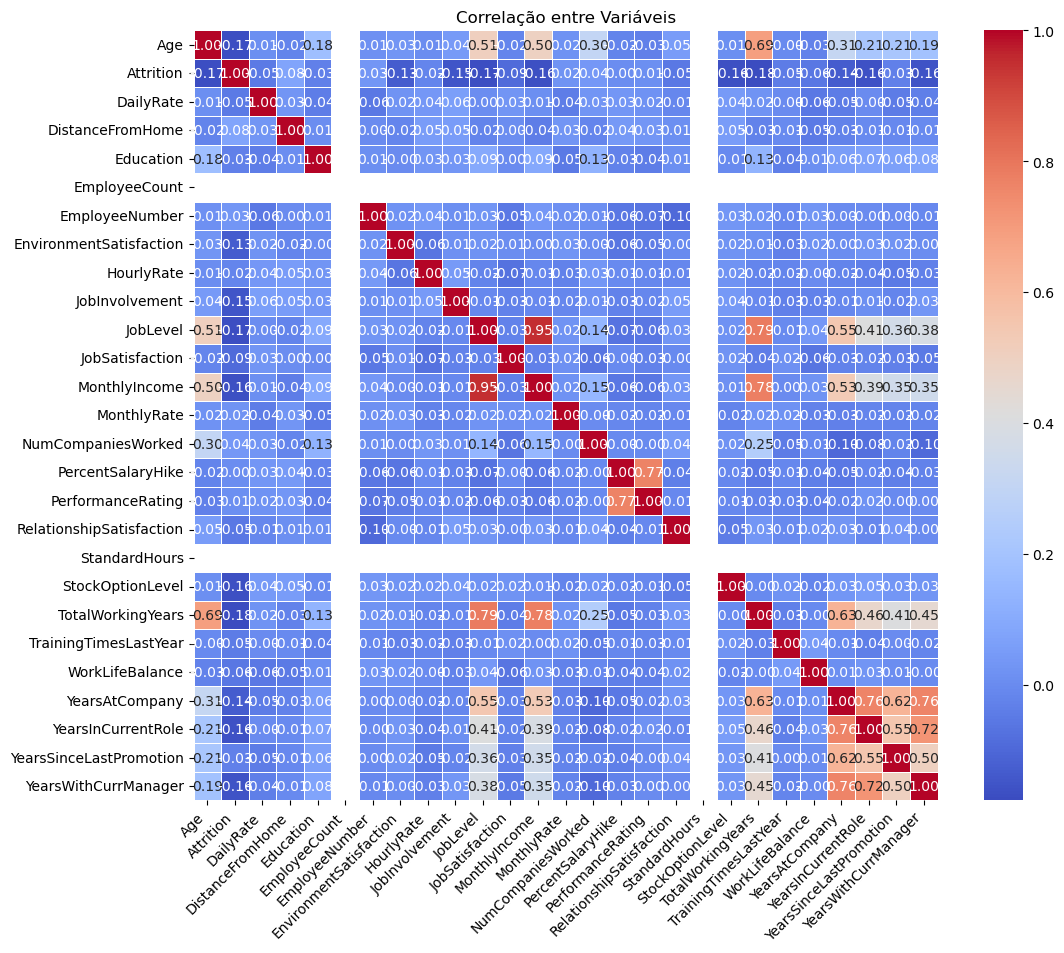

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustando o tamanho da figura
plt.figure(figsize=(12, 10))

# Gerando o heatmap com anotações e ajustando o tamanho da fonte
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 10})

plt.title('Correlação entre Variáveis')

# Ajustando rotação dos rótulos dos eixos x e y
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.show()

Insight: Há uma correlação positiva entre o nível de satisfação no trabalho e o desempenho do funcionário.

SyntaxError: invalid syntax (722529575.py, line 1)